<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 23 декабря 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 23 декабря, -4 балла после 06:00 30 декабря, -6 баллов после 06:00 6 января

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [49]:
# Your Code Here
df = pd.read_csv('titanium.csv', sep=',')
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [50]:
df.head()
print df.x.min()
print df.x.max()
print df.x.mean()

print df.y.max()
print df.y.min()
print df.y.mean()

585.0
1065.0
825.0
2.169
0.601
0.804591836735


In [51]:
df.iloc[:]['y'] = (df.iloc[:]['y'] - df['y'].mean())/df['y'].std()

In [52]:
df.iloc[:]['x'] = (df.iloc[:]['x'] - df['x'].mean())/df['x'].std()

3.63820729955


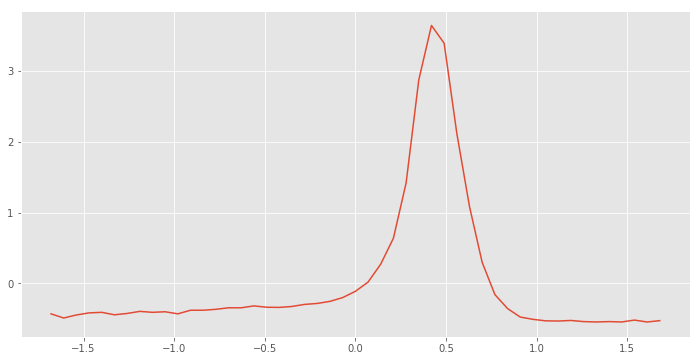

In [53]:
print df.y.max()
plt.plot(df.x.values,df.y.values)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предсказанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [55]:
X = df.x.values.reshape(-1,1)
y = df.y.values
from sklearn.metrics import mean_absolute_error
errs = np.empty((3, 10))
for i, c in enumerate(np.logspace(-2,2,10)):
    # линейное
    model = SVR(kernel='linear', epsilon=0.01, C=c)
    model.fit(X, y)
    errs[0, i] = mean_absolute_error(y, model.predict(X))
    # полиномиальное
    model = SVR(kernel='poly', degree=3, gamma=6, coef0=1, epsilon=0.01, C=c)
    model.fit(X, y)
    errs[1, i] = mean_absolute_error(y, model.predict(X))
    # rbf
    model = SVR(kernel='rbf', gamma=6, coef0=1, epsilon=0.01, C=c)
    model.fit(X, y)
    errs[2, i] = mean_absolute_error(y, model.predict(X))

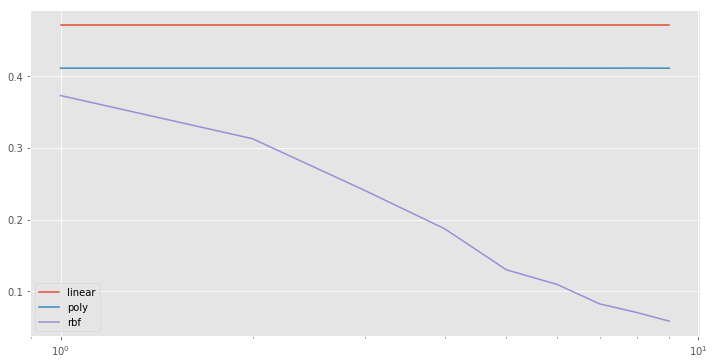

In [56]:
## Your Code Here
plt.plot(errs[0], label='linear')
plt.plot(errs[1], label='poly')
plt.plot(errs[2], label='rbf')
plt.xscale('log')
plt.legend()

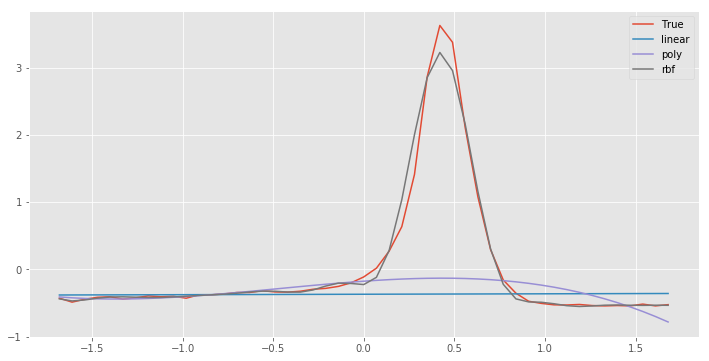

In [57]:
plt.plot(X, y, label='True')
model = SVR(kernel='linear', epsilon=0.01, C=100)
model.fit(X, y)
plt.plot(X, model.predict(X), label='linear')
model = SVR(kernel='poly', degree=3, gamma=6, coef0=1, epsilon=0.01, C=100)
model.fit(X, y)
plt.plot(X, model.predict(X), label='poly')
model = SVR(kernel='rbf', gamma=6, coef0=1, epsilon=0.01, C=100)
model.fit(X, y)
plt.plot(X, model.predict(X), label='rbf')
plt.legend()

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [122]:
## Your Code Here
data_es = pd.read_csv('war_and_peace_es.txt', header=None, names=['word'])
data_es['label'] = 0
data_en = pd.read_csv('war_and_peace_en.txt', header=None, names=['word'])
data_en['label'] = 1

data = pd.concat([data_es, data_en])

In [123]:
# like this

data.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [124]:
from sklearn.cross_validation import train_test_split

In [125]:
RND_SEED = 100
MAX_WORDS = 1000

data = data.sample(frac=1, random_state=RND_SEED).reset_index(drop=True)
X = np.arange(MAX_WORDS, dtype='int64')
y = data.loc[:MAX_WORDS-1, 'label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [126]:
from Levenshtein import distance

In [129]:
def string_kernel(U, V):
    #Your Code Here
    sigma = 4.0
    dists = np.zeros([U.shape[0], V.shape[0]])
    for i in range(U.shape[0]):
        for j in range(V.shape[0]):
            dists[i, j] = distance(data.loc[U[i], 'word'], data.loc[V[j], 'word'])
    return np.exp(-dists ** 2 / (2 * sigma))
print X_train.shape
G = string_kernel(X_train, X_train)

(600,)


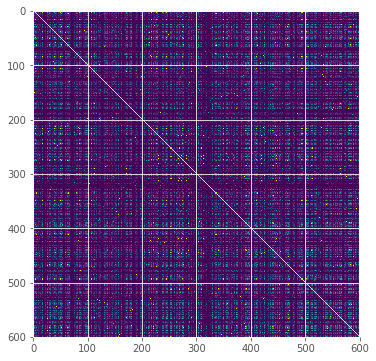

In [130]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [131]:
from sklearn.metrics import accuracy_score

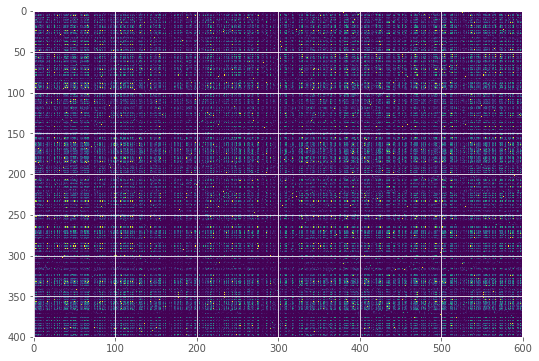

In [132]:
d = string_kernel(X_test, X_train)

plt.imshow(d)

In [133]:
# Your Code Here
N = 100

accs = np.empty([2, N])
c_log = np.logspace(-2, 0, N)
print c_log
best_test_acc = 0
for i, c in enumerate(c_log):
    svc = SVC(C=c, kernel='precomputed')
    svc.fit(G, y_train)
    accs[0, i] = accuracy_score(y_train, svc.predict(G))
    accs[1, i] = accuracy_score(y_test, svc.predict(d))
    if accs[1, i] > best_test_acc:
        best_test_acc = accs[1, i]
        print 'New best accouracy on test set: {:.3f}, C = {:.3f}'.format(best_test_acc, c)

[ 0.01        0.01047616  0.01097499  0.01149757  0.01204504  0.01261857
  0.01321941  0.01384886  0.01450829  0.01519911  0.01592283  0.01668101
  0.01747528  0.01830738  0.0191791   0.02009233  0.02104904  0.02205131
  0.0231013   0.02420128  0.02535364  0.02656088  0.02782559  0.02915053
  0.03053856  0.03199267  0.03351603  0.03511192  0.0367838   0.03853529
  0.04037017  0.04229243  0.04430621  0.04641589  0.04862602  0.05094138
  0.05336699  0.0559081   0.05857021  0.06135907  0.06428073  0.06734151
  0.07054802  0.07390722  0.07742637  0.08111308  0.08497534  0.08902151
  0.09326033  0.097701    0.1023531   0.10722672  0.1123324   0.1176812
  0.12328467  0.12915497  0.13530478  0.14174742  0.14849683  0.15556761
  0.16297508  0.17073526  0.17886495  0.18738174  0.19630407  0.20565123
  0.21544347  0.22570197  0.23644894  0.24770764  0.25950242  0.27185882
  0.28480359  0.29836472  0.31257158  0.32745492  0.34304693  0.35938137
  0.37649358  0.39442061  0.41320124  0.43287613  0.

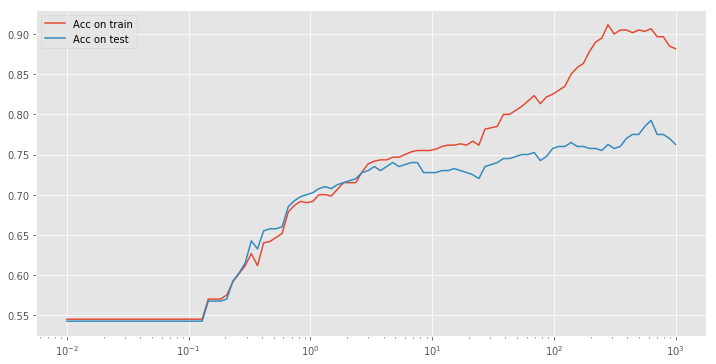

In [134]:
plt.plot(c_to_inspect, accs[0,:], label='Acc on train')
plt.plot(c_to_inspect, accs[1,:], label='Acc on test')
plt.xscale('log')
plt.legend()